### $\verb|Long Short Term Memory|$ for Time Series Forecasting 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_squared_error
import seaborn as sns                            # more plots
sns.set()
from tqdm import tqdm_notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

In [2]:
pwd

'/media/animesh/Windows/Users/Animesh/Desktop/Time Series Stuff'

In [3]:
path = os.path.join('/media/animesh/Windows/Users/Animesh/Desktop/Time Series Stuff',"shampoo.csv")

In [4]:
series = pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]],
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal=b'.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_lines=T

In [ ]:
series = pd.read_csv

In [5]:
series = pd.read_csv

In [6]:
parser = lambda x: pd.datetime.strptime("190" + x, "%Y-%m")

In [7]:
series = pd.read_csv(path, index_col = 0, squeeze=True, header = 0, parse_dates=[0], date_parser=parser)

In [8]:
series

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

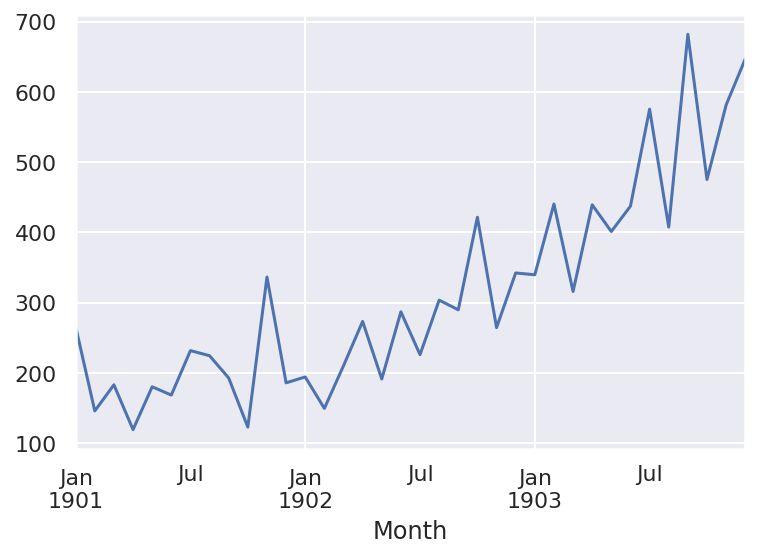

In [9]:
series.plot()

In [10]:
train, test = series.values[:-12], series.values[-12:]

In [11]:
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    predictions.append(history[-1])
    
    history.append(test[i])

rmse = np.sqrt(mean_squared_error(test,predictions))

In [12]:
rmse

136.76131884905664

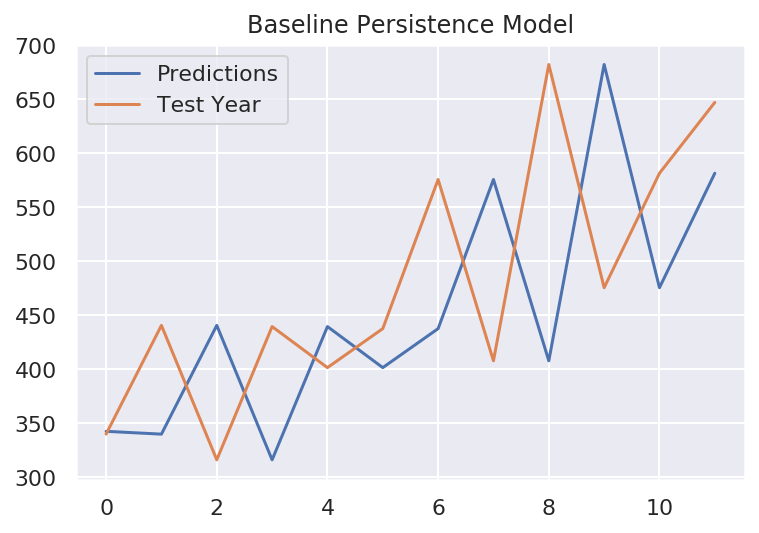

In [13]:
plt.plot(predictions, label = "Predictions")
plt.plot(test, label = "Test Year")
plt.title("Baseline Persistence Model")
plt.legend()

In [14]:
train

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3])

### Time Series to Supervised Learning

In [15]:
def ts_to_supervised(data,lag = 1):
    df = pd.DataFrame(data)
    for i in range(1,lag+1):
        df["lag_{}".format(i)] = df.shift(i)
    df.fillna(0,inplace = True)
    return df

In [16]:
supervised = ts_to_supervised(series,1)
supervised

,Sales,lag_1
Month,,
1901-01-01,266.0,0.0
1901-02-01,145.9,266.0
1901-03-01,183.1,145.9
1901-04-01,119.3,183.1
1901-05-01,180.3,119.3
1901-06-01,168.5,180.3
1901-07-01,231.8,168.5
1901-08-01,224.5,231.8
1901-09-01,192.8,224.5


##### Clearly, this dataset is not stationary, as there is a *structure to the data that is dependent on time*, more specefically, an increasing trend with increasing time, we will remove the trend before training and will add later on.

One common way to detrend a time series data is to consider a different time series where each entry is a difference between that day entry and the previous day's entry.

In [17]:
def difference(data_df, interval = 1):
    data = data_df.values
    diff = list()
    for i in range(0,interval):
        diff.append(data[i])
    for i in range(interval,len(data)):
        diff.append(data[i] - data[i-interval])
    return diff

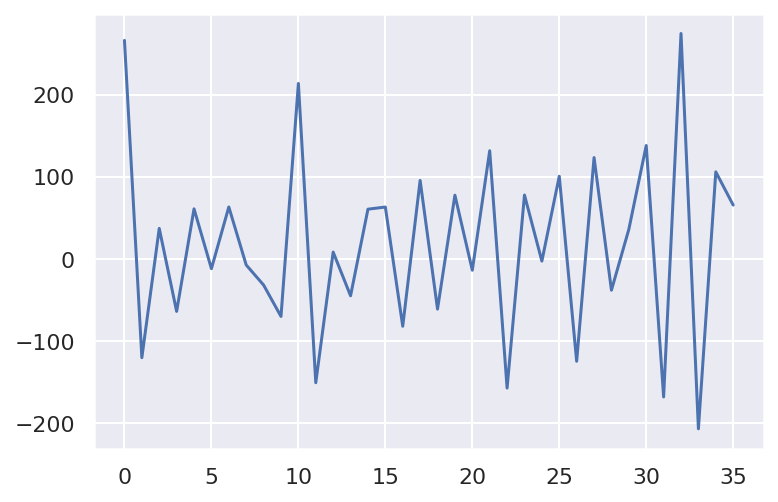

In [18]:
diff = difference(series,1)
plt.plot(diff)

In [19]:
def inverse_diff(diff,interval = 1):
    original = []
    for i in range(0,interval):
        original.append(diff[i])
    
    for i in range(interval, len(diff)):
        original.append(diff[i] + original[i-1])
        
    return original

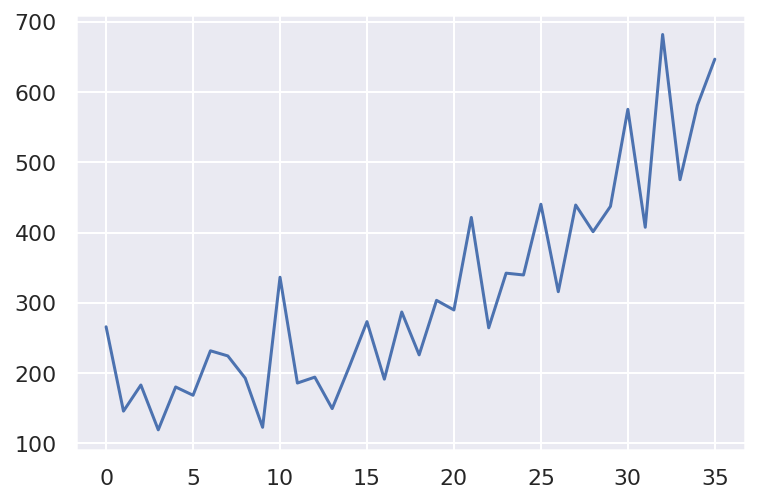

In [20]:
plt.plot(inverse_diff(diff,interval = 1))

In [21]:
diff

[266.0,
 -120.1,
 37.19999999999999,
 -63.8,
 61.000000000000014,
 -11.800000000000011,
 63.30000000000001,
 -7.300000000000011,
 -31.69999999999999,
 -69.9,
 213.6,
 -150.6,
 8.400000000000006,
 -44.80000000000001,
 60.599999999999994,
 63.20000000000002,
 -81.9,
 95.6,
 -61.0,
 77.60000000000002,
 -13.700000000000045,
 131.70000000000005,
 -157.10000000000002,
 77.80000000000001,
 -2.6000000000000227,
 100.69999999999999,
 -124.5,
 123.40000000000003,
 -38.0,
 36.099999999999966,
 138.10000000000002,
 -167.89999999999998,
 274.4,
 -206.7,
 105.99999999999994,
 65.60000000000002]

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
X = series.values

In [24]:
X = X.reshape(len(X),1)
scaler = MinMaxScaler(feature_range=(-1,1))
X_scaled = scaler.fit_transform(X)

In [25]:
pd.DataFrame(X_scaled)

,0
0,-0.478585
1,-0.905456
2,-0.773236
3,-1.000000
4,-0.783188
5,-0.825129
6,-0.600142
7,-0.626089
8,-0.738760
9,-0.987205


In [26]:
X_inverted = scaler.inverse_transform(X_scaled)

In [27]:
X_inverted

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [28]:
def scale(train, test):
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaler = scaler.fit(train)
    train,test = train.reshape(train.shape[0],train.shape[1]), test.reshape(test.shape[0], test.shape[1])
    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)
    return scaler,train_scaled,test_scaled

In [128]:
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

## Creating $\verb|LSTM Network|$

Since we will use Keras, the working of the $\verb|LSTM|$ should be understood.

Thus, in keras, a LSTM network maintains a state within one batch of the dataset. A batch here is defined as the number of rows of the dataset to process before updating the weighs.

By default, the states are cleared, thus, we have to make them *stateful*.

The LSTM Network requires input data in the following dimension: [samples, time steps, features].

* **Samples:** These are independent observations from the dataset.
* **Time Steps:** These are seperate time steps of a given variable for a given observation.
* **Features:** These are seperate measures observed at the time of observation.


Our Dataset is quite simple with each observation at each timestep and one feature.

In [30]:
series.values

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [31]:
X = train.reshape(-1,1)
X.shape

(24, 1)

In [32]:
X = X.reshape(X.shape[0],1,X.shape[1])

In [33]:
X.shape

(24, 1, 1)

In [34]:
import keras

Using TensorFlow backend.


In [35]:
import keras.layers

In [36]:
keras.layers.LSTM?

Init signature:
keras.layers.LSTM(
    units,
    activation='tanh',
    recurrent_activation='sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    implementation=2,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    **kwargs,
)
Docstring:     
Long Short-Term Memory layer - Hochreiter 1997.

# Arguments
    units: Positive integer, dimensionality of the output space.
    activation: Activation function to use
        (see [activations](../activations.md)).
        Default: hyperbolic tangent (`tanh`).
        If you pass `None`, no activation is applied
      

In [37]:
layer = keras.layers.LSTM(units=3,batch_input_shape = (3,X.shape[1],X.shape[2]))

In [61]:
def fit_basic_lstm(train_values, units, batch_size, num_epochs):
    X,y = train_values[:,-1].reshape(-1,1),train_values[:,0]
    X = X.reshape(X.shape[0],1,X.shape[1])
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units = units, batch_input_shape = (batch_size,X.shape[1],X.shape[2]), stateful = True))
    model.add(keras.layers.Dense(1))
    model.compile(optimizer = 'adam', loss = "mean_squared_error")
    for i in range(num_epochs):
        model.fit(X,y,batch_size=batch_size, shuffle = False)
        model.reset_states()
    return model

In [94]:
v = train_scaled[:,-1].reshape(-1,1)
v = v.reshape(v.shape[0],1,v.shape[1])
v.shape

(24, 1, 1)

In [39]:
keras.Sequential.fit?

Signature:
keras.Sequential.fit(
    self,
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    **kwargs,
)
Docstring:
Trains the model for a fixed number of epochs (iterations on a dataset).

# Arguments
    x: Input data. It could be:
        - A Numpy array (or array-like), or a list of arrays
          (in case the model has multiple inputs).
        - A dict mapping input names to the corresponding
          array/tensors, if the model has named inputs.
        - A generator or `keras.utils.Sequence` returning
          `(inputs, targets)` or `(inputs, targets, sample weights)`.
        - None (default) if feeding from framework-native
          tensors (e.g.

In [40]:
x = train.reshape(-1,1)

In [41]:
x[:,0:-1]

array([], shape=(24, 0), dtype=float64)

In [42]:
raw_values = series.values

In [43]:
diff_values = difference(series,1)

In [44]:
diff = pd.DataFrame(diff_values)
supervised = ts_to_supervised(diff)

In [45]:
supervised_values = supervised.values

In [46]:
train, test = supervised_values[0:-12], supervised_values[-12:]

In [47]:
scaler,train_scaled,test_scaled = scale(train,test)

In [136]:
train

array([[ 266. ,    0. ],
       [-120.1,  266. ],
       [  37.2, -120.1],
       [ -63.8,   37.2],
       [  61. ,  -63.8],
       [ -11.8,   61. ],
       [  63.3,  -11.8],
       [  -7.3,   63.3],
       [ -31.7,   -7.3],
       [ -69.9,  -31.7],
       [ 213.6,  -69.9],
       [-150.6,  213.6],
       [   8.4, -150.6],
       [ -44.8,    8.4],
       [  60.6,  -44.8],
       [  63.2,   60.6],
       [ -81.9,   63.2],
       [  95.6,  -81.9],
       [ -61. ,   95.6],
       [  77.6,  -61. ],
       [ -13.7,   77.6],
       [ 131.7,  -13.7],
       [-157.1,  131.7],
       [  77.8, -157.1]])

In [70]:
test_scaled

array([[-0.2696762 ,  0.1103758 ],
       [ 0.21862444, -0.2696762 ],
       [-0.84589931,  0.21862444],
       [ 0.32592768, -0.84589931],
       [-0.43701253,  0.32592768],
       [-0.08674072, -0.43701253],
       [ 0.3954148 , -0.08674072],
       [-1.05105176,  0.3954148 ],
       [ 1.03970693, -1.05105176],
       [-1.23445994,  1.03970693],
       [ 0.24367762, -1.23445994],
       [ 0.05270622,  0.24367762]])

#### $0^{th}$ column is the column that we will predict (i.e. the target vector) and the $1^{st}$ column will be the input to the model.

In [73]:
test_scaled.shape

(12, 2)

In [67]:
model = fit_basic_lstm(train_scaled,3,1,3000)

Epoch 1/1
24/24 [==============================] - 1s 44ms/step - loss: 0.2723
Epoch 1/1
24/24 [==============================] - 0s 5ms/step - loss: 0.2671
Epoch 1/1
24/24 [==============================] - 0s 6ms/step - loss: 0.2627
Epoch 1/1
24/24 [==============================] - 0s 5ms/step - loss: 0.2587
Epoch 1/1
24/24 [==============================] - 0s 6ms/step - loss: 0.2551
Epoch 1/1
24/24 [==============================] - 0s 5ms/step - loss: 0.2519
Epoch 1/1
24/24 [==============================] - 0s 9ms/step - loss: 0.2489
Epoch 1/1
24/24 [==============================] - 0s 7ms/step - loss: 0.2462
Epoch 1/1
24/24 [==============================] - 0s 6ms/step - loss: 0.2437
Epoch 1/1
24/24 [==============================] - 0s 6ms/step - loss: 0.2413
Epoch 1/1
24/24 [==============================] - 0s 6ms/step - loss: 0.2390
Epoch 1/1
24/24 [==============================] - 0s 5ms/step - loss: 0.2368A: 0s - loss: 0.221
Epoch 1/1
24/24 [===========================

#### After the model's been fit on the training data, for forecasting, we'll use the fixed approach, i.e. forecasting all of the test values from the model fit on training data.

In [69]:
def forecast(model, test_row, batch_size):
    X = test_row[0:-1]
    X = X.reshape(1,1,len(X))
    y_pred = model.predict(X,batch_size)
    return y_pred

In [84]:
model_copy = model

Since the states were reset after epoch, something that we don't want during the forecasting, instead we want it to build-up the states as we forecast into the future.

Seeding the state can be done by making a full prediction on all of training data.

Seeding the model's internal state by evaluating on all of train data

In [119]:
train_scaled_reshaped = train_scaled[:,-1].reshape(-1,1,1)
model.predict(train_scaled_reshaped,batch_size=1)

array([[0.77567685],
       [0.87390125],
       [1.0297663 ],
       [1.1289179 ],
       [1.4480875 ],
       [1.0630491 ],
       [1.2304426 ],
       [1.0227664 ],
       [1.1930091 ],
       [1.363578  ],
       [1.5772666 ],
       [0.90149736],
       [1.383713  ],
       [1.2571813 ],
       [1.4330484 ],
       [1.0615296 ],
       [0.9803891 ],
       [1.444325  ],
       [0.9753236 ],
       [1.3569658 ],
       [1.0073984 ],
       [1.2064996 ],
       [0.8861327 ],
       [1.5184138 ]], dtype=float32)

In [120]:
array = np.array([[0.77567685],
       [0.87390125],
       [1.0297663 ],
       [1.1289179 ],
       [1.4480875 ],
       [1.0630491 ],
       [1.2304426 ],
       [1.0227664 ],
       [1.1930091 ],
       [1.363578  ],
       [1.5772666 ],
       [0.90149736],
       [1.383713  ],
       [1.2571813 ],
       [1.4330484 ],
       [1.0615296 ],
       [0.9803891 ],
       [1.444325  ],
       [0.9753236 ],
       [1.3569658 ],
       [1.0073984 ],
       [1.2064996 ],
       [0.8861327 ],
       [1.5184138 ]])

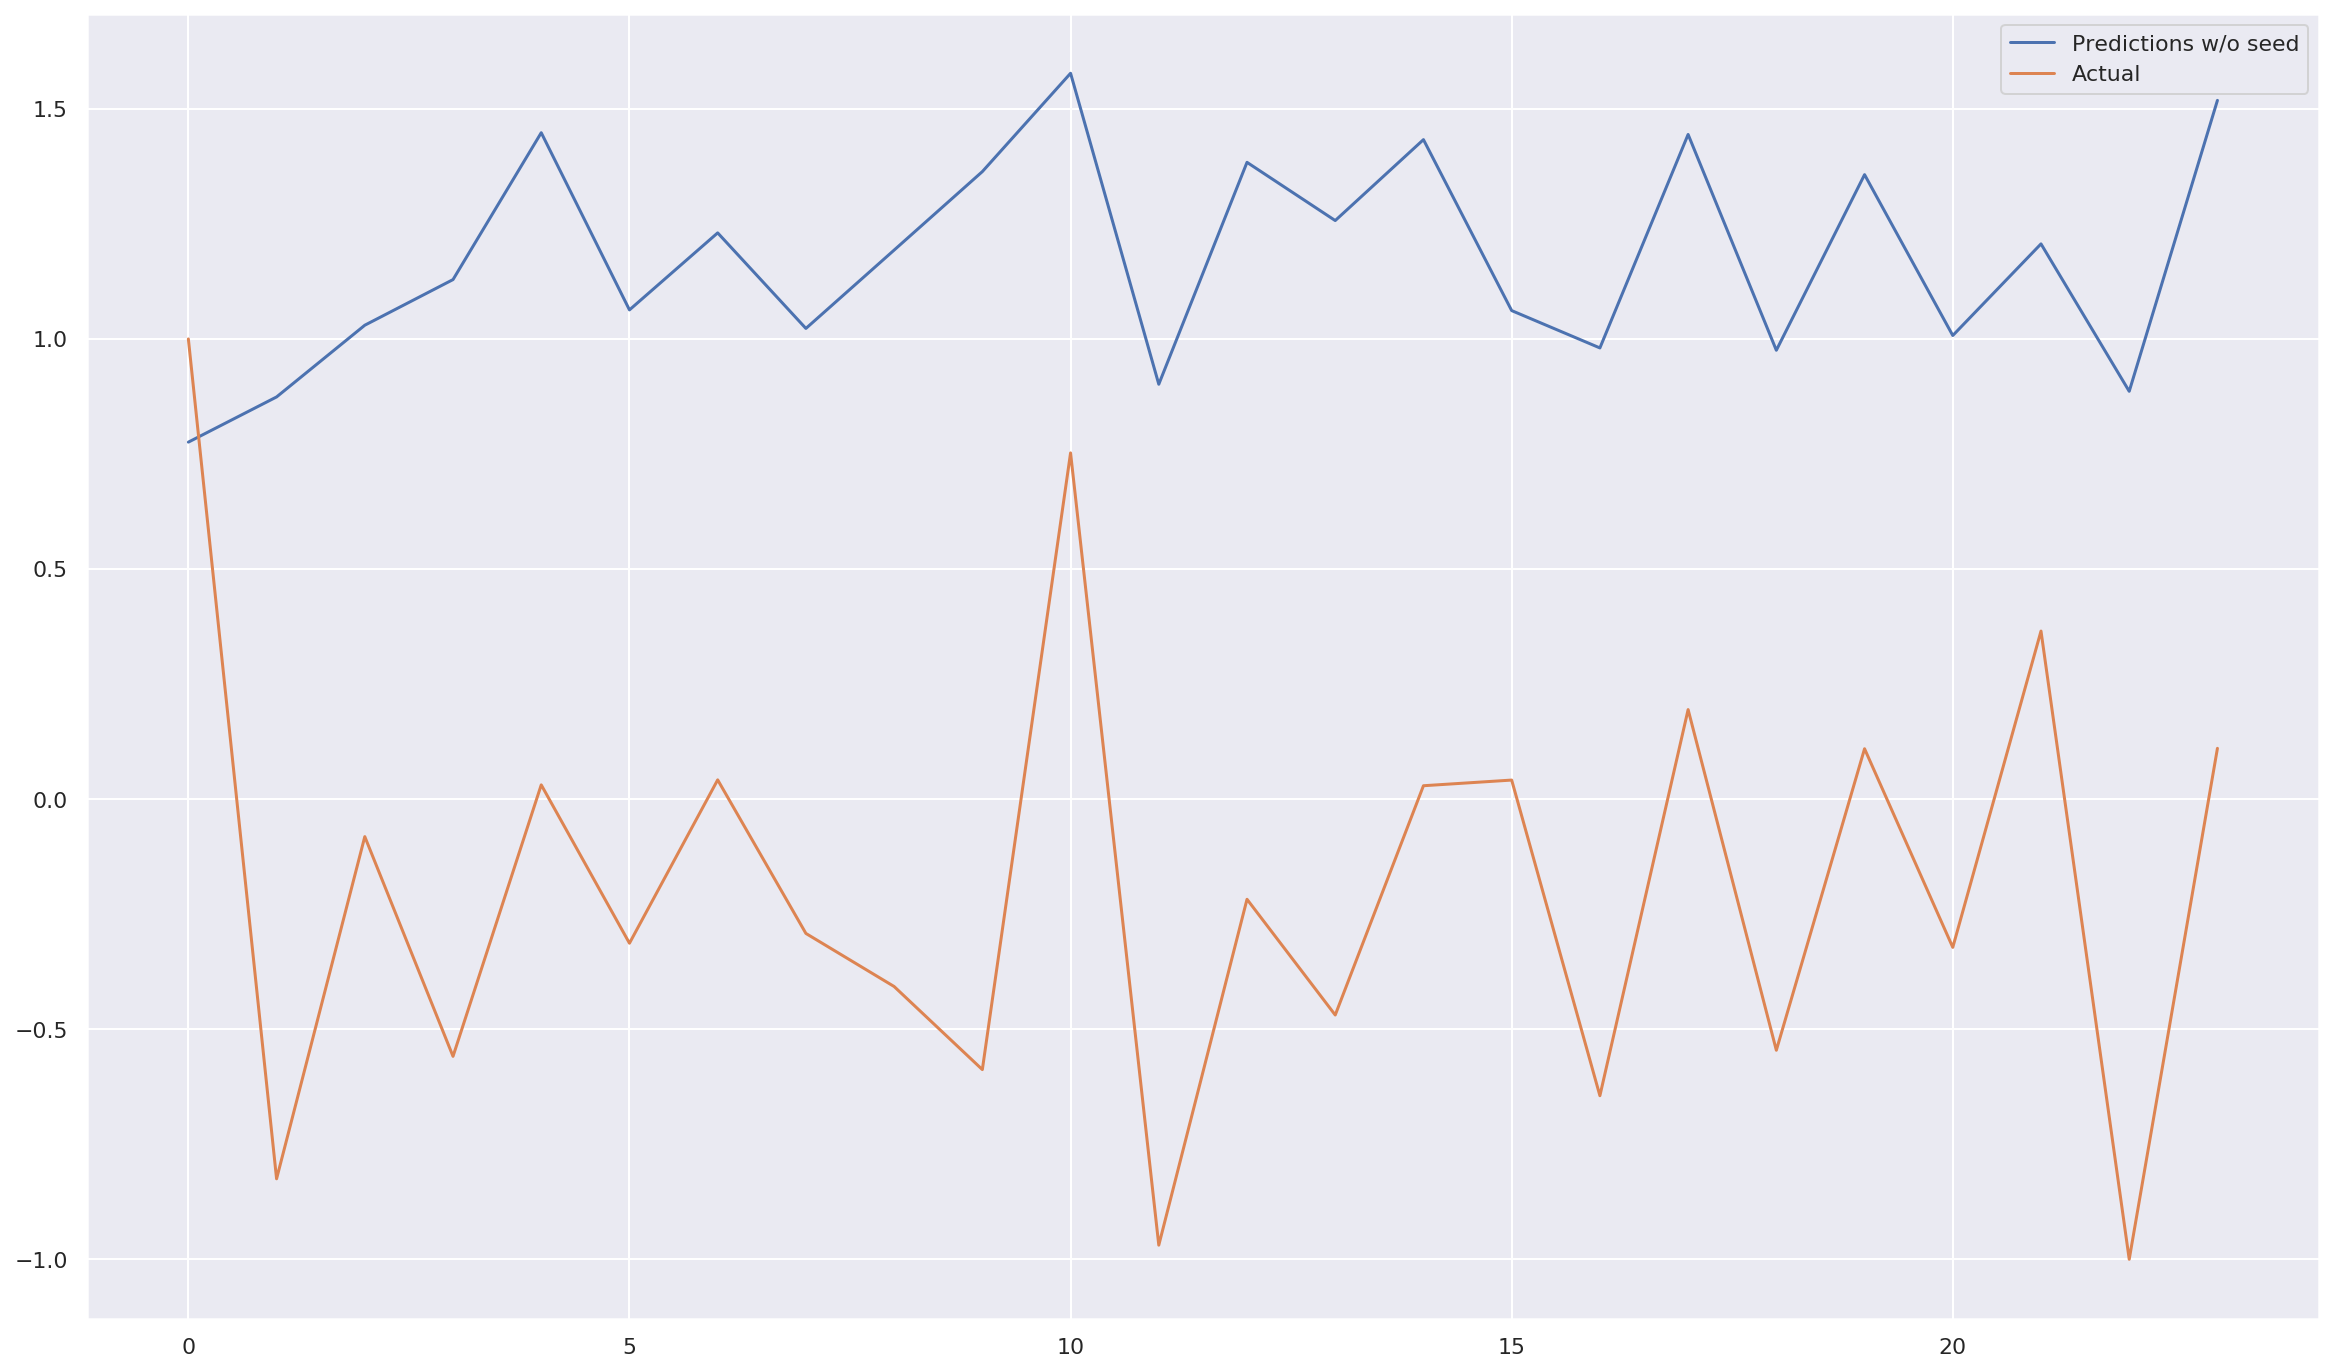

In [126]:
plt.figure(figsize = (20,12))
plt.plot(array,label = "Predictions w/o seed")
plt.plot(train_scaled[:,0],label = "Actual")
plt.legend()

In [162]:
predictions = list()
for i in range(len(test_scaled)):
    X ,y = test_scaled[i,-1],test_scaled[i,0]
    y_pred = model.predict(X.reshape(1,1,1),batch_size=1)
    row_inv_scaled = scaler.inverse_transform(np.append(y_pred.reshape(-1,1),X.reshape(-1,1),axis = 1))
    predictions.append(row_inv_scaled)
    

In [168]:
predictions

[array([[251.29844152,  77.8       ]]),
 array([[293.25806264,  -2.6       ]]),
 array([[249.3318475, 100.7      ]]),
 array([[ 373.11406387, -124.5       ]]),
 array([[251.66860197, 123.4       ]]),
 array([[314.6195586, -38.       ]]),
 array([[290.55426223,  36.1       ]]),
 array([[236.25796859, 138.1       ]]),
 array([[ 372.00991243, -167.9       ]]),
 array([[251.44182258, 274.4       ]]),
 array([[ 335.40896779, -206.7       ]]),
 array([[257.26704548, 106.        ]])]

In [170]:
pred_arr = np.array(predictions)

In [159]:
a = scaler.inverse_transform(np.append(array[0,0].reshape(-1,1),train_scaled[:,1][0].reshape(-1,1),axis = 1))
np.append(a,scaler.inverse_transform(np.append(array[1,0].reshape(-1,1),train_scaled[:,1][1].reshape(-1,1),axis = 1)),axis = 0)

array([[218.54443762,   0.        ],
       [239.32380944, 266.        ]])

In [175]:
pred_arr = pred_arr.reshape(-1,2)

In [176]:
test_scaled.shape == pred_arr.shape

True

In [195]:
final_pred = inverse_diff(pred_arr)
final = list()
for i in range(len(final_pred)):
    final.append(final_pred[i][0])

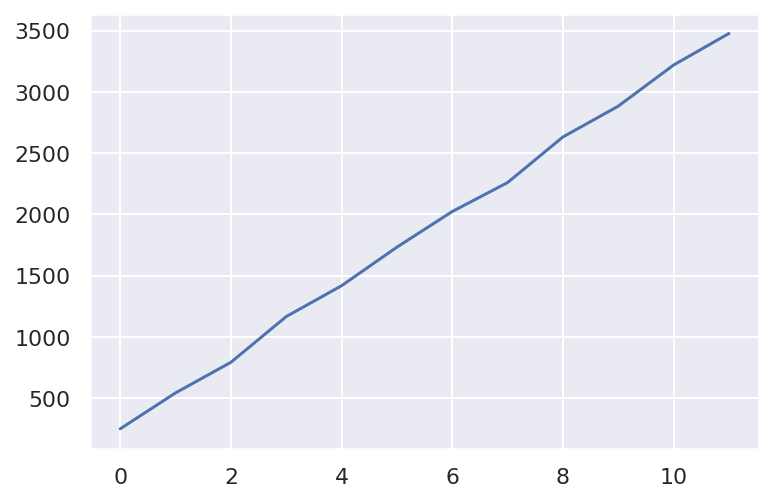

In [197]:
plt.plot(final)

Clearly, there were some problems in the above code, or maybe number of neurons were less.

Anyways, we will fix this in the next practice notebook.